In [1]:
# %load mlp_function_approximation.py
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1000) 
function_to_learn = lambda x: np.cos(x) + 0.1*np.random.randn(*x.shape)
layer_1_neurons = 10
NUM_points = 1000
#TRAIN_SPLIT = .8
batch_size = 100
NUM_EPOCHS = 1500

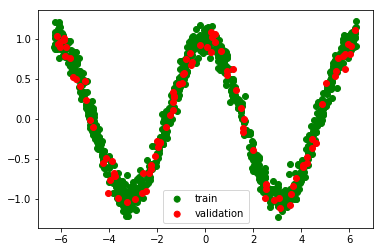

In [3]:
all_x = np.float32(np.random.uniform(-2*math.pi, 2*math.pi, (NUM_points, 1)))
np.random.shuffle(all_x)


train_size = int(900)
#the first 700 points are in the training set 
x_training = all_x[:train_size]
y_training = function_to_learn(x_training)

#the last 300 are in the validation set
x_validation = all_x[train_size:]
y_validation = function_to_learn(x_validation)

plt.figure(1)
plt.scatter(x_training, y_training, c='green', label='train')
plt.scatter(x_validation, y_validation, c='red', label='validation')
plt.legend()
plt.show()

In [4]:
X = tf.placeholder(tf.float32, [None, 1], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

In [5]:
W_h = tf.Variable(tf.random_uniform([1, layer_1_neurons], \
            minval=-1, maxval=1, dtype=tf.float32))
b_h = tf.Variable(tf.random_uniform([1, layer_1_neurons], \
            dtype=tf.float32))

In [6]:
h = tf.nn.sigmoid( tf.matmul(X, W_h)+b_h )

In [7]:
W_o = tf.Variable(tf.random_uniform([layer_1_neurons, 1],\
            minval=-1, maxval=1, dtype=tf.float32))
b_o = tf.Variable(tf.random_uniform([1, 1],\
            dtype=tf.float32))

In [8]:
model = tf.matmul(h, W_o) + b_o
loss = tf.nn.l2_loss(model - Y)
train_op = tf.train.AdamOptimizer().minimize(loss)

In [15]:
errors = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(NUM_EPOCHS):
        for start, end in zip(range(0, len(x_training), batch_size),\
                              range(batch_size, len(x_training), batch_size)):
            sess.run(train_op, feed_dict={X: x_training[start:end],\
                                          Y: y_training[start:end]})
        cost = sess.run(loss, feed_dict={\
                    X:x_validation, Y:y_validation})
        errors.append(cost)
        if i%100 == 0: 
            print ("epoch %d, cost = %g" % (i, cost))

epoch 0, cost = 63.4604
epoch 100, cost = 22.7654
epoch 200, cost = 20.5201
epoch 300, cost = 17.3479
epoch 400, cost = 13.7401
epoch 500, cost = 10.2442
epoch 600, cost = 7.25833
epoch 700, cost = 4.86974
epoch 800, cost = 3.07375
epoch 900, cost = 1.85608
epoch 1000, cost = 1.14676
epoch 1100, cost = 0.80476
epoch 1200, cost = 0.666909
epoch 1300, cost = 0.612116
epoch 1400, cost = 0.58356


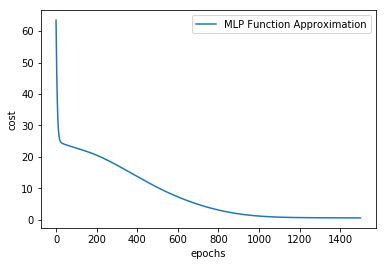

In [16]:
plt.plot(errors,label='MLP Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()